In [1]:
from src import Prep
from src.Time_Series_Helper_Funcs import *

Elapsed time is 0.000001 seconds.


In [2]:
%load_ext autoreload

In [3]:
%reload_ext autoreload

In [246]:
%autoreload

[autoreload of src.Time_Series_Helper_Funcs failed: Traceback (most recent call last):
  File "/Users/jenniferpaige/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/jenniferpaige/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/Users/jenniferpaige/opt/anaconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/jenniferpaige/opt/anaconda3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 

In [245]:
test_stat_models()

p-value of original data (ols, linear,rf)
0.6887189093626884
0.9535485287405795
0.7386780381754514
-------
p-value of differenced data(ols, linear,rf)
2.1176631895498247e-08
0.0
4.695511959892895e-09


In [5]:
df = Prep.prep()

1 of 11 |    Reading in first dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
Elapsed time is 34.200885 seconds.
2 of 11 |    Reading in second dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
Elapsed time is 2.531883 seconds.
3 of 11 |    Concatenating datasets together
4 of 11 |    Refining to only RES Customer Segment
5 of 11 |    Cleaning up column names
6 of 11 |    Sorting values by installation_date
7 of 11 |    Assigning installation_date as index
8 of 11 |    Replacing all null values with median values from same year
9 of 11 |    Adusting prices for inflation
Elapsed time is 51.742311 seconds.
10 of 11|    Creating target variable: cost_per_watt
11 of 11|    Removing > 1600 outliers above $25 per watt
Prep complete 
 ------

In [6]:
y = time_frame(df)

In [7]:
ols_model, ols_y = lag_ols(y)[0], lag_ols(y)[1]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.737e+04
Date:                Wed, 18 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:39:50   Log-Likelihood:                -320.64
No. Observations:                 885   AIC:                             649.3
Df Residuals:                     881   BIC:                             668.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0235      0.035      0.676      0.4

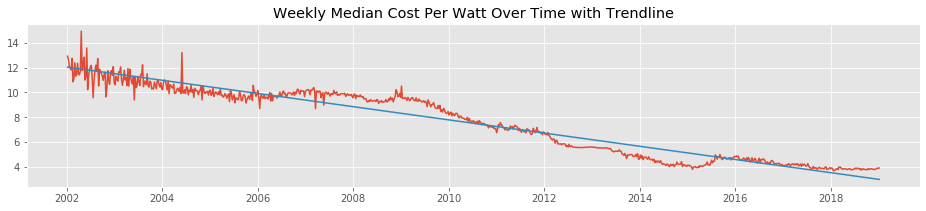

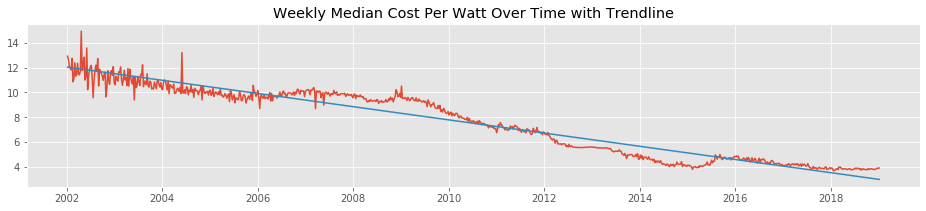

In [18]:
linear_model, linear_trend = linear_model_trend(y)[0], linear_model_trend(y)[1]

In [33]:
rf_model, rf_predict = random_forest_model(y)[0], random_forest_model(y)[1]

/Users/jenniferpaige/getit/Solar/src/Time_Series_Helper_Funcs.py:402: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X,y)


OOB Score: 0.9801937319325545
r2 score on test: 0.9972119895263836


/Users/jenniferpaige/getit/Solar/src/Time_Series_Helper_Funcs.py:402: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X,y)


OOB Score: 0.9810515765268477
r2 score on test: 0.9972244185509158


In [34]:
print('confidence interval for linear model \n', ols_model.conf_int())
print('-----------------------------------------')
print('covariance matrix for linear model \n', ols_model.cov_params())

print('confidence interval for linear model \n', linear_model.conf_int())
print('-----------------------------------------')
print('covariance matrix for linear model \n', linear_model.cov_params())

confidence interval for linear model 
                   0         1
Intercept -0.044707  0.091696
Lag1       0.240108  0.360290
Lag2       0.220402  0.341413
Lag3       0.353029  0.473051
-----------------------------------------
covariance matrix for linear model 
            Intercept      Lag1      Lag2      Lag3
Intercept   0.001208 -0.000045 -0.000048 -0.000049
Lag1       -0.000045  0.000937 -0.000472 -0.000458
Lag2       -0.000048 -0.000472  0.000950 -0.000472
Lag3       -0.000049 -0.000458 -0.000472  0.000935
confidence interval for linear model 
                0          1
const  11.962426  12.142040
x1     -0.010398  -0.010048
-----------------------------------------
covariance matrix for linear model 
           const            x1
const  0.002094 -3.534835e-06
x1    -0.000004  7.952384e-09


In [50]:
ols_model.params
linear_model.params

const    12.052233
x1       -0.010223
dtype: float64

In [101]:
score_table(y, ols_model, linear_model, rf_model)

,MAE,MSE,RMSE
Models,,,
OLS,0.189762,0.120843,0.347625
LINEAR,0.555970,0.555970,0.745634
RF,0.073447,0.020437,0.142959


In [147]:
adfuller(rf_predict, autolag='AIC')[1]

0.7386780381754514

In [ ]:
test_stat_

In [140]:
print('OLS')
test_stationarity(ols_model.fittedvalues)
ols_diff = ols_model.fittedvalues.diff(periods=1)
print('--OLS DIFF--')
test_stationarity(ols_diff.dropna())
print('-')
test_stationarity(linear_model.fittedvalues)
lin_diff = linear_model.fittedvalues.diff(periods=1)
print('-')
test_stationarity(lin_diff.dropna())
print('-')
test_stationarity(rf_predict)
rf_diff = pd.DataFrame(rf_predict).diff(periods=1)
print('-')
test_stationarity(rf_diff.dropna())

OLS
Results of Dickey-Fuller Test:
Test Statistic                  -1.164401
p-value                          0.688719
#Lags Used                      21.000000
Number of Observations Used    863.000000
Critical Value (1%)             -3.437950
Critical Value (5%)             -2.864895
Critical Value (10%)            -2.568556
dtype: float64
--OLS DIFF--
Results of Dickey-Fuller Test:
Test Statistic                -6.389982e+00
p-value                        2.117663e-08
#Lags Used                     2.100000e+01
Number of Observations Used    8.620000e+02
Critical Value (1%)           -3.437959e+00
Critical Value (5%)           -2.864899e+00
Critical Value (10%)          -2.568558e+00
dtype: float64
-
Results of Dickey-Fuller Test:
Test Statistic                  -0.057088
p-value                          0.953549
#Lags Used                      20.000000
Number of Observations Used    867.000000
Critical Value (1%)             -3.437915
Critical Value (5%)             -2.864879
Crit

Results of Dickey-Fuller Test:
Test Statistic                  -0.057088
p-value                          0.953549
#Lags Used                      20.000000
Number of Observations Used    867.000000
Critical Value (1%)             -3.437915
Critical Value (5%)             -2.864879
Critical Value (10%)            -2.568548
dtype: float64
-
Results of Dickey-Fuller Test:
Test Statistic                 -40.966950
p-value                          0.000000
#Lags Used                      15.000000
Number of Observations Used    871.000000
Critical Value (1%)             -3.437880
Critical Value (5%)             -2.864864
Critical Value (10%)            -2.568540
dtype: float64


In [137]:
test_stationarity(rf_predict)
rf_diff = pd.DataFrame(rf_predict).diff(periods=1)
print('-')
test_stationarity(rf_diff.dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -1.039258
p-value                          0.738678
#Lags Used                      20.000000
Number of Observations Used    867.000000
Critical Value (1%)             -3.437915
Critical Value (5%)             -2.864879
Critical Value (10%)            -2.568548
dtype: float64
-
Results of Dickey-Fuller Test:
Test Statistic                -6.666796e+00
p-value                        4.695512e-09
#Lags Used                     1.900000e+01
Number of Observations Used    8.670000e+02
Critical Value (1%)           -3.437915e+00
Critical Value (5%)           -2.864879e+00
Critical Value (10%)          -2.568548e+00
dtype: float64


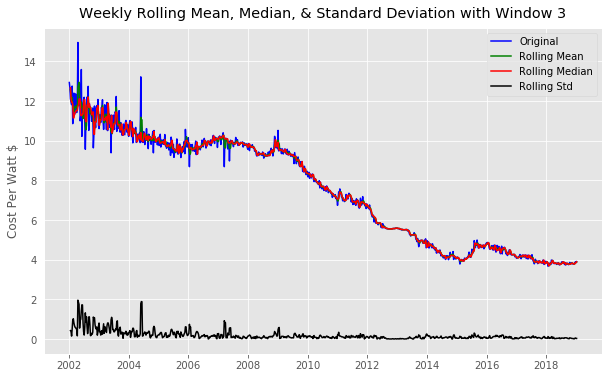

Results of Dickey-Fuller Test:
Test Statistic                  -1.323589
p-value                          0.618312
#Lags Used                      21.000000
Number of Observations Used    866.000000
Critical Value (1%)             -3.437924
Critical Value (5%)             -2.864883
Critical Value (10%)            -2.568550
dtype: float64


In [121]:
rolling_plot(y)
test_stationarity(y)

In [54]:
# The timeseries is stationary at d = 1 where only the first lag is above the significance level.

ADF p-value: 0.00
Achieved stationarity! Reject ADF H0.


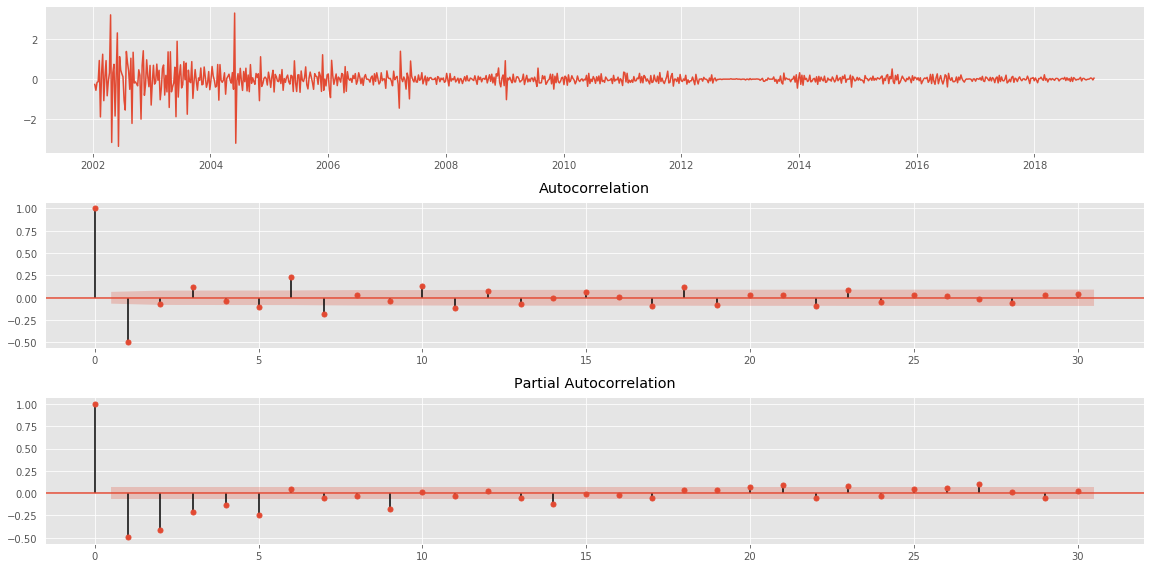

In [122]:
diff = get_differences(y)

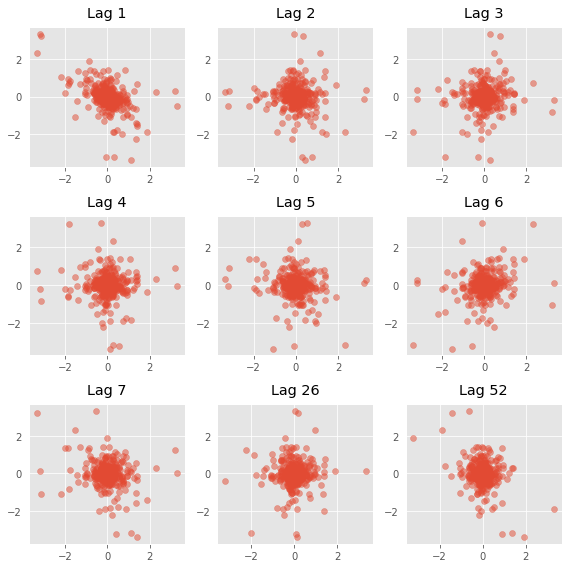

In [123]:
plot_ac_scat(diff)

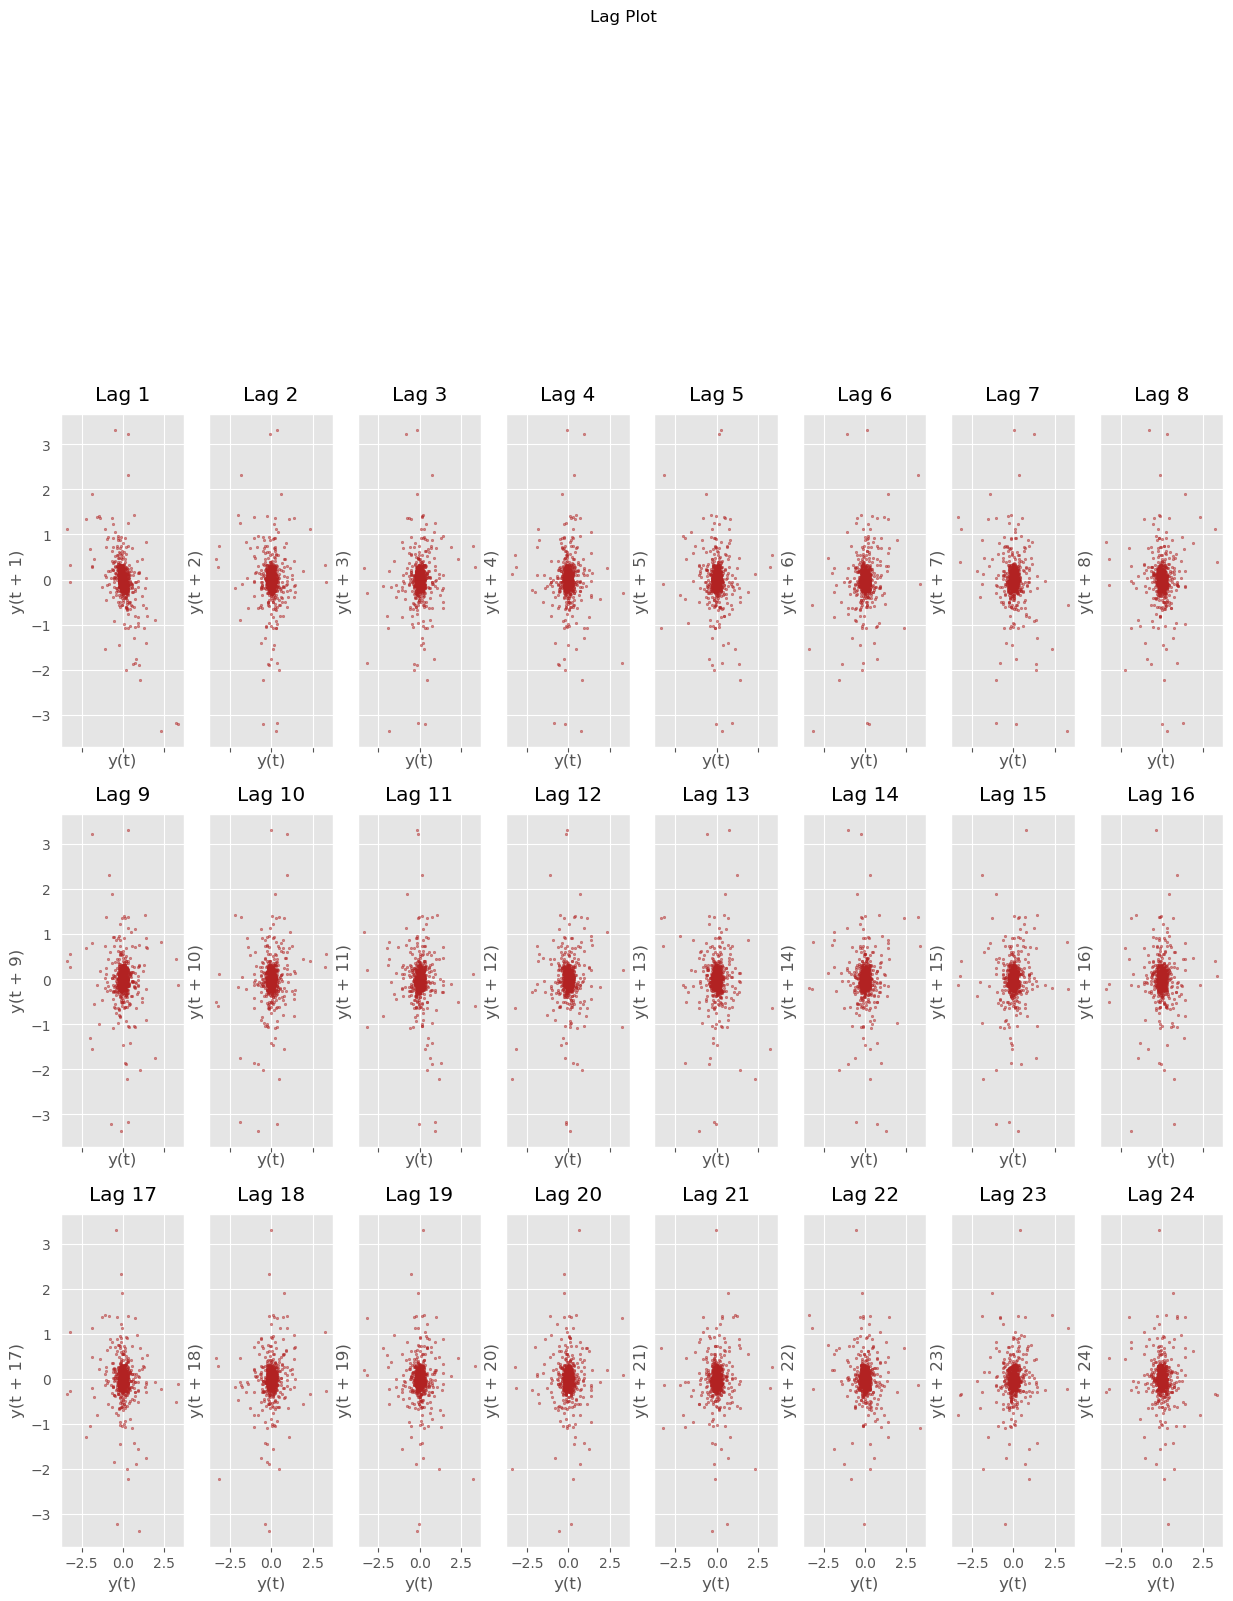

In [124]:
lag_plots(diff)

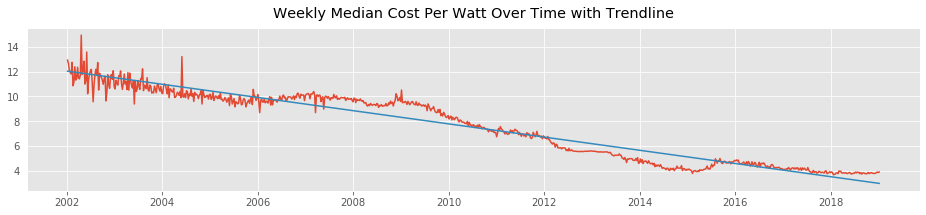

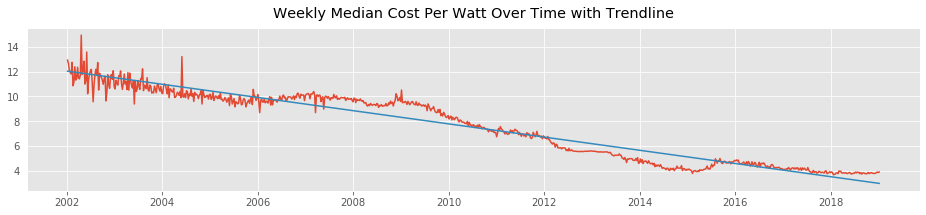

In [127]:
linear_model, linear_trend = linear_model_trend(y)[0], linear_model_trend(y)[1]

In [151]:
linear_model, linear_trend = linear_model_trend(y)[0], linear_model_trend(y)[1]
print('mse total for linear model on price        ', linear_model.mse_total)
print('rmse residual for linear model on price    ', np.sqrt(linear_model.mse_total)) 
print('-----------------------------------------')
print('confidence interval for linear model \n', linear_model.conf_int())
print('-----------------------------------------')
print('covariance matrix for linear model \n', linear_model.cov_params())

mse total for linear model on price         7.338660621388017
rmse residual for linear model on price     2.708996238717953
-----------------------------------------
confidence interval for linear model 
                0          1
const  11.962426  12.142040
x1     -0.010398  -0.010048
-----------------------------------------
covariance matrix for linear model 
           const            x1
const  0.002094 -3.534835e-06
x1    -0.000004  7.952384e-09


In [155]:
linear_model.fittedvalues

installation_date
2002-01-06    12.042010
2002-01-13    12.031787
2002-01-20    12.021564
2002-01-27    12.011341
2002-02-03    12.001118
                ...    
2018-12-09     3.015188
2018-12-16     3.004965
2018-12-23     2.994742
2018-12-30     2.984519
2019-01-06     2.974296
Freq: W-SUN, Length: 888, dtype: float64

In [63]:
from statsmodels.tsa.stattools import pacf_ols, pacf, arma_order_select_ic

In [ ]:
arma_order_select_ic

In [ ]:
from from statsmodels.tsa import 